In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

### Visualizing the sort function

In [4]:
def sort(x, y):
    return (x, y) if x >= y else (y, x)

In [5]:
sorts = []
for x in range(1, 10):
    for y in range(1, 10):
        sorts.append(sort(x, y))

/Users/mmt9876/opt/anaconda3/envs/pytorch-v1/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'The sort function')

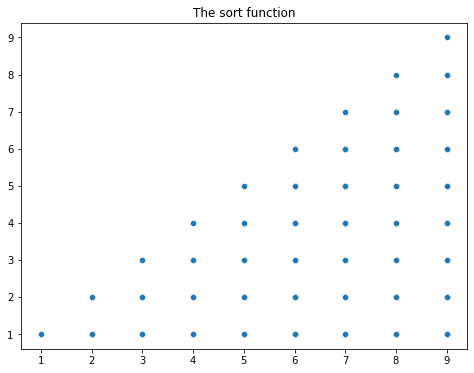

In [6]:
x_sorts = [point[0] for point in sorts]
y_sorts = [point[1] for point in sorts]

plt.figure(figsize=(8, 6))
sns.scatterplot(x_sorts, y_sorts)
plt.title("The sort function")

### Create Artificial Dataset

In [2]:
from train import *

In [7]:
n_train_qids = 800
n_val_qids = 200
n_docs = 20
n_dim = 50

In [8]:
X_train, Y_train, X_val, Y_val = create_dataset(n_train_qids, n_val_qids, n_docs, n_dim)

### Build the model

In [1]:
from model import RankNet

In [9]:
net = RankNet(n_dim)

### Train the model

In [10]:
import torch.optim as optim
from tqdm import tqdm

In [11]:
optimizer = optim.Adam(net.parameters(), lr=1e-3)
n_sampling_combinations = 50
n_epochs = 250

In [12]:
ndcg_list = []
for epoch in tqdm(range(n_epochs)):
    ndcg = train_one_epoch(X_train, Y_train, X_val, Y_val, net, optimizer)
    ndcg_list.append(ndcg)

100%|██████████| 250/250 [04:01<00:00,  1.04it/s]


### Plot loss and metrics

In [13]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'NDCG')

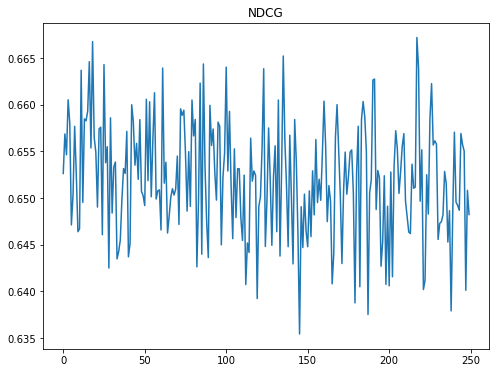

In [15]:
plt.figure(figsize=(8, 6))
plt.plot(ndcg_list)
plt.title("NDCG")